### *Veriyi Hazırlama (Encoding)*

Makine Öğrenmesi modelleri matematikseldir, kelimelerden anlamaz. Bunun için "Kırmızı", "Mavi" yazısını sayıya çevirmemiz lazım. Burada iki yöntem vardır:

#### Label Encoding

- Nedir? Her kategoriye bir sıra numarası verir. (Küçük -> 0, Orta -> 1, Büyük -> 2)
- Ne Zaman Kullanırız? Eğer veride sıralama/hiyerarşi varsa (Örn: Eğitim Seviyesi -> İlkokul < Lise < Üniversite)
- Tehlikesi ise eğer Elma, Armut, Muz için kullanırsak, makine o zaman Muz(2), Elma(0)'dan büyük sanır ve yanlıştır.

#### One-Hot Encoding

- Nedir? Her kategori için yeni bir sütun açar ve sadece o kategoriye 1 yazar.
- Ne Zaman Kullanırız? Sıralamanın önemsiz olduğu durumlarda (Renkler, Şehirler, Markalar)
- Gelecekte derin öğrenme ve NLP için kelimeleri matrise çevirirken bu mantık kullanılır.

### *Model (Random Forest)*

- Nedir? Adı üzerinde "Rastgele Orman". Tek bir Karar Ağacı (Decision Tree) bazen veriyi ezberler (Overfitting). RF, 100 tane ağaç kurar. Her biri farklı bir şeye bakar ve oy çokluğuyla karar verir.
- Ağaçların %80'i Phishing dedi, %20'si Güvenli dedi. O zaman sonuç Phishing.
- Neden Kullanılır? Çok sağlamdır, kolay kolay hata yapmaz ve ayar gerektirmez.
- Topluluk Modellerinden biridir.

#### *Karne (Metrikler ve Confusion Matrisi)*
Modeli eğittikten sonra birçok metriğe bakarız ki modelimizin çalışma oranı nasıldır diye?

##### 1. Confusion Matrix (Karmaşıklık Matrisi)
Bu bir tablodur. 4 ihtimal vardır.
- TP (True Positive): Hırsızı yakaldın. (Doğru)
- TN (True Negative): Suçsuzu bıraktın. (Doğru)
- FP (False Positive): Masum adama "Hırsız" dedin. (Yalancı Alarm - Tip 1 Hata)
- FN (False Negative): Hırsızı kaçırdın. (En Tehlikelisi - Tip 2 Hata)

![image](/Users/melih/PycharmProjects/Python-Data-Science-Learnings-With-Doc/Self-Learnings/confusion-Matrix.PNG)
![image](/Users/melih/PycharmProjects/Python-Data-Science-Learnings-With-Doc/Self-Learnings/predicted_condition_2_.webp)


##### 2. HeatMap (Isı Haritası)
Confusion Matrix'in renklendirilmiş hali diyebiliriz. Nerede hata yaptığını (Koyu renkli kareler) gözle hemen görmeni sağlar.

![image](/Users/melih/PycharmProjects/Python-Data-Science-Learnings-With-Doc/Self-Learnings/heatmap.jpg)

##### 3. Accuracy (Doğruluk)
- Formül: Doğru Bildiklerim / Hepsi
- Tuzak şudur misal sen 100 veriden 99'unu bildin model hepsine güvenli derse bilme oranı %99 Accuracy çıkar ama virüsü yakalayamaz
- Dengesiz verilerde kullanma!

##### 4. Precision (Kesinlik)
- Soru şudur "Hırsız" dediklerimin kaçı gerçekten hırsız?
- Ne Zaman Önemli? Masum insanları suçlamak istemiyorsan (Örn: Spam filtresi, önemli mailin spama düşmemeli.)

##### 5. Recall (Duyarlılık/Yakalama)
- Soru şudur gerçek hırsızların yüzde kaçını yakaladım?
- Ne Zaman Önemli? Siber Güvenlik, Sağlık gibi alanlarda. Eğer virüs veya kanserli hücre varsa kaçırmaman lazım ama yanlış alarm verse de sorun değil sadece kaçırma!

##### 6. F1-Score 
- Precision ile Recall'ın ortalamasıdır. İkisinin dengeli olmasını istersen buna bakarız.

##### 7. AUC-ROC(Area Under Curve)
- Nedir? Modelin ayrıştırma yeteneğidir.
    - 0.5 -> Yazı tura atıyor (Çöp)
    - 1.0 -> Mükemmel ayrıştırıyor.
    - Genelde 0.80 üzeri iyi deriz.


Örnek : Cinsiyet, Şehir, Label, Maaş değişkenleriyle birlikte gitme ve kalmayı tahmin eden RF modeli

Label Encoding Sonucu: (Erkek: 0, Kadin: 1)
  Cinsiyet  Cinsiyet_Encoded
0    Erkek                 0
1    Kadin                 1
2    Kadin                 1
3    Erkek                 0
4    Kadin                 1
5    Erkek                 0
6    Kadin                 1
7    Erkek                 0

One-Hot Encoding Sonucu: (Şehir sütunları)
  Cinsiyet  Maas  Label  ...  Sehir_Bursa  Sehir_Istanbul  Sehir_Izmir
0    Erkek  5000      1  ...        False            True        False
1    Kadin  6000      0  ...        False           False        False
2    Kadin  5500      0  ...        False           False         True
3    Erkek  7000      1  ...         True           False        False
4    Kadin  6500      0  ...        False           False        False
5    Erkek  5200      1  ...        False            True        False
6    Kadin  6200      0  ...        False           False        False
7    Erkek  5800      1  ...        False           False         True

[8 rows x 9

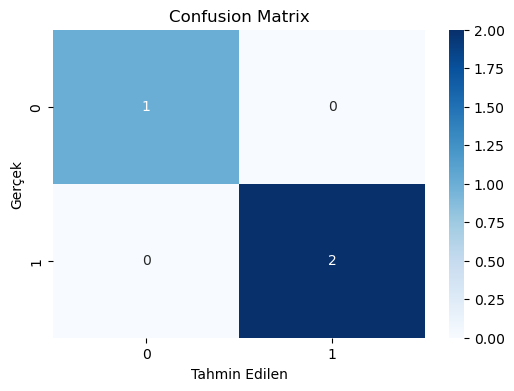

Accuracy (Doğruluk): 1.00
Precision (Kesinlik): 1.00
Recall (Duyarlılık): 1.00
F1 Score: 1.00
AUC - ROC: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
)

# Hayali bir veri seti oluşturalım.
data = {
    'Sehir': ['Istanbul', 'Ankara', 'Izmir', 'Bursa', 'Antalya', 'Istanbul', 'Ankara', 'Izmir'],
    'Cinsiyet': ['Erkek', 'Kadin', 'Kadin', 'Erkek', 'Kadin', 'Erkek', 'Kadin', 'Erkek'],
    'Maas': [5000, 6000, 5500, 7000, 6500, 5200, 6200, 5800],
    'Label': [1, 0, 0, 1, 0, 1, 0, 1] # 0: Kaldı, 1: Terk Etti
}

df = pd.DataFrame(data) # Veri çerçevesi oluşturma burada 4 sütun var # Sehir, Cinsiyet, Maas, Label

# Encoding (Makine diline çeviri)

# A) Label Encoding (Cinsiyet sütunu için)
le = LabelEncoder() #le kısaltması kullandık
df['Cinsiyet_Encoded'] = le.fit_transform(df['Cinsiyet']) # Erkek: 0, Kadin: 1
print("Label Encoding Sonucu: (Erkek: 0, Kadin: 1)")
print(df[['Cinsiyet', 'Cinsiyet_Encoded']]) # Cinsiyet sütunu ve encoded hali

# B) One-Hot Encoding (Şehir sütunu için)
# pd.get_dummies kullanabiliriz. Hazır bir fonksiyon.
df_encoded = pd.get_dummies(df, columns=['Sehir'], prefix='Sehir') # Şehir sütununu one-hot encode etme
print("\nOne-Hot Encoding Sonucu: (Şehir sütunları)")
print(df_encoded) # One-hot encoded veri çerçevesi

# Modelleme Eğitimi Random Forest Classifier
# Veriyi X(Girdi) ve y (Çıktı) olarak ayırıyoruz
X = df_encoded.drop(['Label', 'Cinsiyet'], axis = 1) # Hedefte kullanılacak girdiyi, Label Encoding olmuş verileri atıyoruz
y = df_encoded['Label'] # Hedef değişken

# Veriyi eğitim ve test olarak ayırıyoruz çünkü modelin performansını test etmemiz lazım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42) # %30 test verisi kalanı %70 eğitim verisi

# Modeli kurma
# 100 tane karar ağacı kullanalım
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train) # Modeli eğitme

# Tahmin yapma
y_pred = rf_model.predict(X_test) # Test verisi üzerinde tahmin yapma
# Oasılık değerleri (AUC - ROC için)
y_proba = rf_model.predict_proba(X_test)[:, 1] # Pozitif sınıfın olasılık değerleri

print("\nModel Değerlendirme Sonuçları:")

# Metrikler (Karne)

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred) # test verisini ve tahmin edilen veriyi karşılaştırma
plt.figure(figsize=(6,4)) # 6x4 boyutunda grafik
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # Isı haritası ile gösterme
plt.title('Confusion Matrix') # Başlık
plt.xlabel('Tahmin Edilen') # X ekseni
plt.ylabel('Gerçek') # Y ekseni
plt.show()

# Metriklerin Hesabı
acc = accuracy_score(y_test, y_pred) # Doğruluk
prec = precision_score(y_test, y_pred) # Kesinlik
rec = recall_score(y_test, y_pred) # Duyarlılık
f1 = f1_score(y_test, y_pred) # F1 Skoru

try:
    auc = roc_auc_score(y_test, y_proba) # AUC - ROC
except:
    auc = 0.5

print(f"Accuracy (Doğruluk): {acc:.2f}")
print(f"Precision (Kesinlik): {prec:.2f}")
print(f"Recall (Duyarlılık): {rec:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC - ROC: {auc:.2f}")

# Detaylı sınıflandırma raporu
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0)) # zero_division=0 hataları önlemek için ekledik


### Titanic Verisi Kullanarak Makine Öğrenmesi Yapalım.

#### Özellik Mühendisliği (Feature Engineering)
Kodda FamilySize ve IsAlone diye iki sütun türeteceğiz.
- Mantığı titanik batarken önce kadınlar sonra çocuklar kuralı vardı ama kalabalık aileler filikaya binmeden önce ailelerini aradıkları için geciktiler ve yalnızlar daha hızlı hareket ettiler.
- Sonuç olarak model sadece "Bilet Fiyatı"na bakmak yerine "Sosyal Durumu"da öğrenmiş oldu.

#### Scaling (Standartlaştırma)
Kodda StandardScaler kullanacağız.
- Neden? Yaş sütununa bakarsak 0-80 arasında, Ücret sütunu ise 0-500 arasında. Ama Cinsiyet 0-1 aralığında.
- Eğer biz scale etmezsek SVM ve Logistic Regression modelleri ücreti yüksek gördüğünden çok önemli sanıp cinsiyeti önemsize atar fakat RF gibi modeller buna ihtiyaç duymaz.

#### Imputation (Eksik Verileri Doldurma)
SimpleImputer fonksiyonu kullanıyoruz.
- Neden? Misal verimizdeki yaş değişkenin eksik verileri var ve bazen işlem hataları yaşayabiliriz.
- Çözüm olarak ortalama yaş ile doldurursak bu eksik verilerden kurtulabiliriz.

#### Modeller (LR, SVM, RF)

##### Logistic Regression
- En basit ve en hızlı modeldir. Genelde "Baz Alınacak Model (Baseline) olarak kullanılır.

##### SVM (Destek Vektör Makineleri)
- Verileri uzayda çizgilerle değil, geniş yollarla ayırmaya çalışır.

##### Random Forest
- Karmaşık ilişkileri yakalayan güçlü modeldir.

Veri Boyutu: (891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
---> 'FamilySize' ve 'IsAlone' sütunları eklendi.
---> Eksik değerler dolduruldu ve encoding işlemleri tamamlandı.
---> Veri eğitim ve test setlerine ayrıldı ve ölçeklendirme yapıldı.

Model Değer

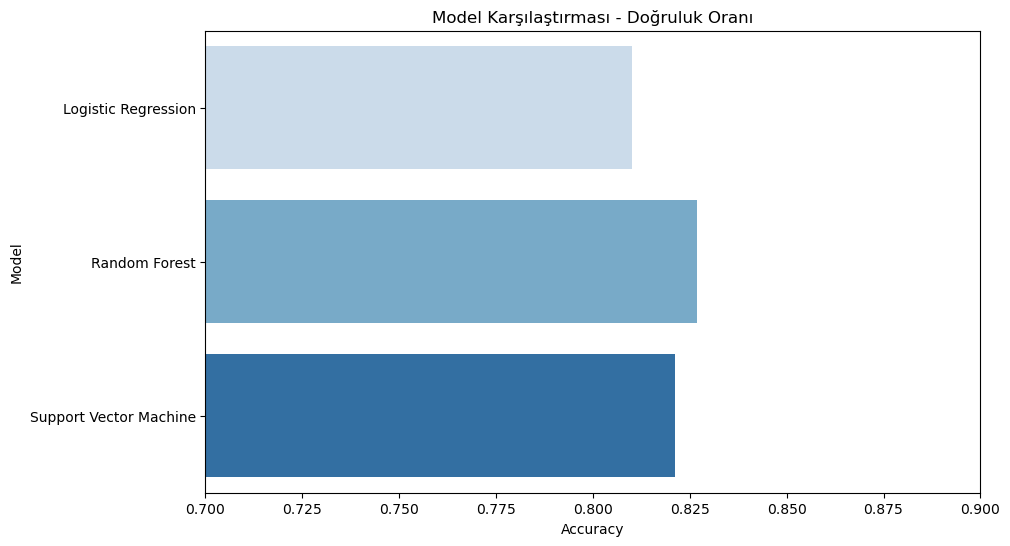

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn Kütüphaneleri (Makine Öğrenmesi için)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Modellerimiz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Veri Yükleme
# Veri direkt Seaborn kütüphanesinden yüklenecek
df = sns.load_dataset('titanic') # Titanic veri seti

# Gereksiz sütunları kaldırma
# deck => Çok fazla eksik veri var
# embark_town => embark sütunu zaten var
# alive => zaten pclass ve survived sütunları var
df.drop(['deck', 'embark_town', 'alive'], axis=1)

print(f"Veri Boyutu: {df.shape}") # Veri boyutunu yazdırma
print(df.head()) # İlk 5 satırı gösterme

# Özellik Mühendisliği ve Veri Ön İşleme
# Özellik 1: Aile Büyüklüğü (Family Size)
# sibsp : Kardeş/ Eş sayısı, parch: Ebeveyn/Çocuk sayısı + 1 (Kendisi)
df['familySize'] = df['sibsp'] + df['parch'] + 1 # Kendisi dahil aile büyüklüğü

# Özellik 2: Yalnız Mı? (Is Alone)
# Eğer ailesi 1 kişiyse (sadece kendisi), yalnızdır.
df['IsAlone'] = 1
df.loc[df['familySize'] > 1, 'IsAlone'] = 0 # familySize 1'den büyükse 0 yap

print("---> 'FamilySize' ve 'IsAlone' sütunları eklendi.")

# Eksik Değerlerin Doldurulması
# Yaş sütunundaki eksik değerleri yaş ortalaması ile dolduralım
imputer = SimpleImputer(strategy='mean') # Ortalama ile doldurma stratejisi
df['age'] = imputer.fit_transform(df[['age']]) # age sütunundaki eksik değerleri doldurma

# 'embarked' (Biniş Limanı) boşsa en çok tekrar edenle (mode) doldur
if 'embarked' in df.columns:
    most_freq = df['embarked'].mode()[0] # En sık tekrar eden değer
    df['embarked'] = df['embarked'].fillna(most_freq) # Eksik değeri onunla doldur

# Encoding (Yazıyı Sayıya Çevirme)
# Cinsiyet: male/female -> 0/1 (Label Encoding uygundur çünkü 2 seçenek var)
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex']) # 0, 1

# One-Hot Encoding: embark (C, Q, S)
# drop_first = True ile Dummy Variable Trap önlenir ilk sütun atarız.
df = pd.get_dummies(df, columns=['embarked','class'], drop_first=True) # One-Hot Encoding

print("---> Eksik değerler dolduruldu ve encoding işlemleri tamamlandı.")

# Model Hazırlığı
# Hedef değişken: survived
# Gereksiz kategorik sütunları da kaldıralım    
X = df.drop(['survived', 'who', 'deck', 'embark_town', 'alive', 'alone'], axis=1) # Girdi değişkenleri
y = df['survived'] # Hedef değişken (1: Hayatta Kaldı, 0: Kalmadı)

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # %20 test verisi

# Ölçeklendirme SVM ve LR için önemlidir
# StandardScaler kullanarak ölçeklendirme yapalım
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Eğitim verisini ölçeklendirme
X_test = scaler.transform(X_test) # Test verisini ölçeklendirme
print("---> Veri eğitim ve test setlerine ayrıldı ve ölçeklendirme yapıldı.")

# Modellerin Eğitimi ve Değerlendirilmesi
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state= 42),
    "Support Vector Machine": SVC(probability=True)
}

results = []

print("\nModel Değerlendirme Sonuçları:")

for model_name, model in models.items():
    
    model.fit(X_train, y_train) # Modeli eğitme
    y_pred = model.predict(X_test) # Test verisi üzerinde tahmin yapma

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    try:
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except:
        auc = 0.5
    
    results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC - ROC": auc
    })
    print(classification_report(y_test, y_pred, zero_division=0))

# Sonuçları DataFrame olarak gösterme
results_df = pd.DataFrame(results)
print("\nTüm Modellerin Karşılaştırması:")
print(results_df)

plt.figure(figsize=(10,6)) #10x6 boyutunda grafik
sns.barplot(x='Accuracy', y='Model',hue = 'Model', data=results_df, palette='Blues') # Doğruluk oranlarını gösterme
plt.title('Model Karşılaştırması - Doğruluk Oranı') # Başlık
plt.xlabel('Accuracy') # X ekseni
plt.ylabel('Model') # Y ekseni
plt.xlim(0.70,0.90) # X ekseni limiti
plt.show()
